# Final Exam 

## 유의사항
* 시험 시간은 50분 입니다.
* 시험 종료 후 .ipynb 파일을 shawn159@snu.ac.kr로 보내주세요. 
* 파일 이름은 실명(닉네임).ipynb로 보내주세요. (닉네임으로 성적이 공지됩니다)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**문제1**  
파스칼 삼각형  

파스칼 삼각형이란 자신의 왼쪽 위의 좌표와 오른쪽 위의 좌표 값을 더해서 값을 갱신시키는 형태의 삼각형을 말합니다.

높이가 h인 파스칼 삼각형을 예제와 같이 출력하는 pascal(h)를 작성하세요. (단, h는 2이상)

아래 그림을 참고하세요.

```
>>> pascal(5)
[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
```


In [5]:
def find_num(row, col):
    if col == row or col == 0:
        return 1
    return find_num(row-1, col-1) + find_num(row-1, col)

def pascal(n):
    for row in range(n):
        column = []
        for col in range(row+1):
            column.append(find_num(row, col))
            #print(find_num(row, col), end=' ')
        print(column)

pascal(5)


[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]


**문제2**

개구리가 아침에 우물을 7미터 올라갔다가 밤에 4미터 미끄러져 내려온다.

우물의 깊이 n이 주어졌을 때 개구리가 며칠 만에 우물을 벗어나는지 그 일수를 리턴하는 함수 escape(n)을 계산하세요.

```
>>> escape(5)
1
```

```
>>> escape(12)
3
```

```
>>> escape(20)
6
```


In [6]:
def escape(height):
    day = 0
    # while True:
    x = 0
    while x < height:
        x += 7
        if x >= height :
            day += 1 #완료
            continue
        x -= 4
        day += 1
    return day

print(escape(5))
print(escape(12))
print(escape(20))
print(escape(50))

1
3
6
16




**문제3**

다음과 같은 두개의 array로 아래 예시와 같은 결과를 만드세요. 

단, 답은 3개 이상 작성해주세요. 부분 점수 있음

```
a = array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

b = array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

>>> ...
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])
```

In [7]:
a = np.array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

b = np.array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

print(np.append(a, b, axis=0))
print(np.vstack((a, b)))

[[0 1 2 3 4]
 [5 6 7 8 9]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 1 2 3 4]
 [5 6 7 8 9]
 [1 1 1 1 1]
 [1 1 1 1 1]]


**문제4**

max_pooling 함수를 구현하세요. max pooling은 단순하게 존재하는 값 중에서 최대값을 선택합니다. max_pooling은 아래 그림과 같이 작동합니다. 

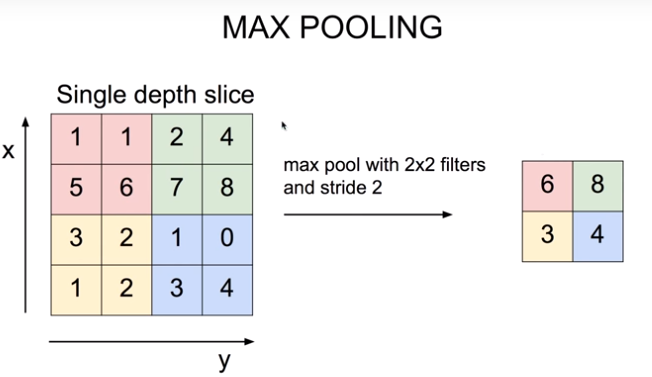

In [ ]:
from IPython.display import Image
Image('max_pooling.png')

예시)

```
arr = 
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]

kernel_size = 2
stride = 2

>>> max_pooling(arr,kernel_size,stride)
[[ 7.  9. 11.]
 [19. 21. 23.]
 [31. 33. 35.]]

```

In [8]:
def max_pooling(arr, kernel_size, stride):
    x_len = int((arr.shape[0] - kernel_size)/stride) + 1
    y_len = int((arr.shape[1] - kernel_size)/stride) + 1
    ret = np.zeros((x_len, y_len))
    for x in range(x_len):
        for y in range(y_len):
            selected_arr = arr[x*stride:x*stride+kernel_size, y*stride:y*stride+kernel_size]
            ret[x][y] = np.max(selected_arr)
    return ret

arr = np.arange(36).reshape(6,6)

kernel_size = 2
stride = 2
print(max_pooling(arr,kernel_size,stride))

[[ 7.  9. 11.]
 [19. 21. 23.]
 [31. 33. 35.]]


**문제5**  
1차원 array 두개를 인자로 받아 rsme를 계산하는 함수 RSME를 구현하세요. RSME는 아래 그림과 같습니다.

$$
{RMSE}=\sqrt{\sum_{i=1}^n\frac{(\hat{y_i}-y_i)^2}{n}}
$$

```
y_hat = np.arange(1,20)
y = np.arange(20,1,-1)
>>> RSME(y_hat, y)
11.0
```


In [15]:
def RSME(y_hat, y):
    return np.sqrt(np.sum((y_hat-y)**2)/(len(y)))

y_hat = np.arange(1,20)
y = np.arange(20,1,-1)
RSME(y_hat, y)

11.0

**문제6**

주어진 데이터셋 abalone.txt를 읽어와 데이터프레임을 만들고, 새로운 열'length_category'을 만들고 "length" 열의 median 값보다 클 경우에는 'long', 작을 경우에 'short'를 넣은 새로운 열을 만드세요.   

단, abalone.txt 파일의 각 열의 정보는 아래와 같습니다.
```
columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

```

In [32]:
abalone = pd.read_csv("abalone.txt", 
                      sep=",", 
                      names = ['sex', 'length', 'diameter', 'height', 
                               'whole_weight', 'shucked_weight', 'viscera_weight', 
                               'shell_weight', 'rings'], 
                      header = None)


**문제7**

다음 질문들에 대한 답을 구하세요.

- 'Savitree  Satram' 의 JobTitle은 ? 
- 가장 연봉(TotapPayMenefits)이 높은 사람은 ?
- JobTitle의 총 갯수는 ? 
- 연봉(TotalPayBenefits) 평균 상위 10개의 직군(JobTitle)은 ?


In [26]:
df = pd.read_csv('Salaries.csv')

C:\Users\edu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
df[df['EmployeeName'] == 'Savitree  Satram']['JobTitle']

99999    Senior Food Service Worker
Name: JobTitle, dtype: object

**문제8**

Titanic 데이터셋에서, 성인 생존자 전체에 대해 그 중 나이가 50 이하인 사람의 비율을 구하세요.




In [17]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [24]:
(titanic.groupby('survived').get_group(1)['age'] < 50).sum() / len(titanic['age'])

0.2951739618406285

**문제9**



타이타닉 데이터프레임을 사용하여 연령대 히스토그램을 그려보세요. 

단, bins = 10으로 합니다.





In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


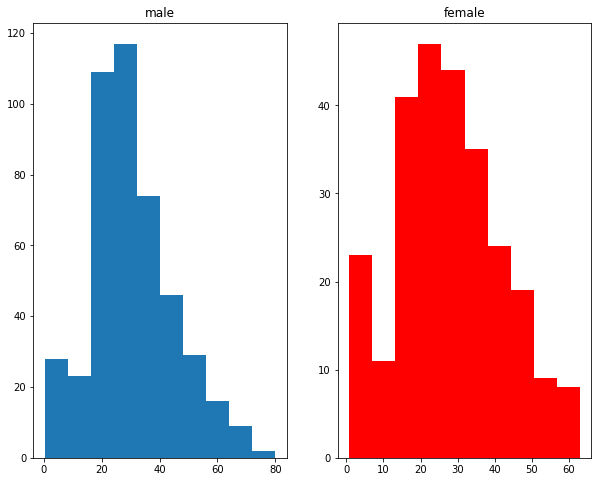

In [46]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('male')
plt.hist(titanic.groupby('sex').get_group('male')['age'].dropna(), bins=10)
plt.subplot(1, 2, 2)
plt.title('female')
plt.hist(titanic.groupby('sex').get_group('female')['age'].dropna(), color='red', bins=10)
plt.show()

**문제10**

타이타닉 데이터셋을 사용하여 생존 비율과 탑승 비율을 담은 아래와 같은 pie chart를 만드세요.

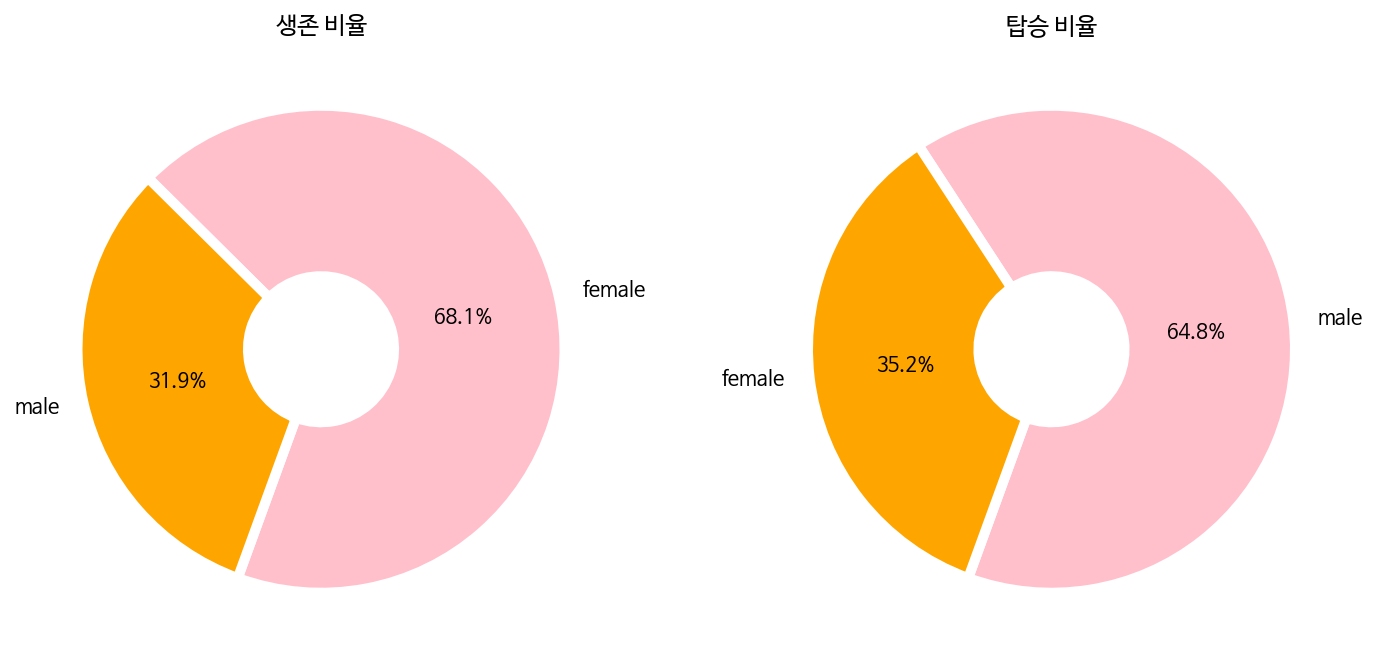